In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [59]:
df=pd.read_csv('Mall_Customers.csv')

In [60]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [61]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]

In [62]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


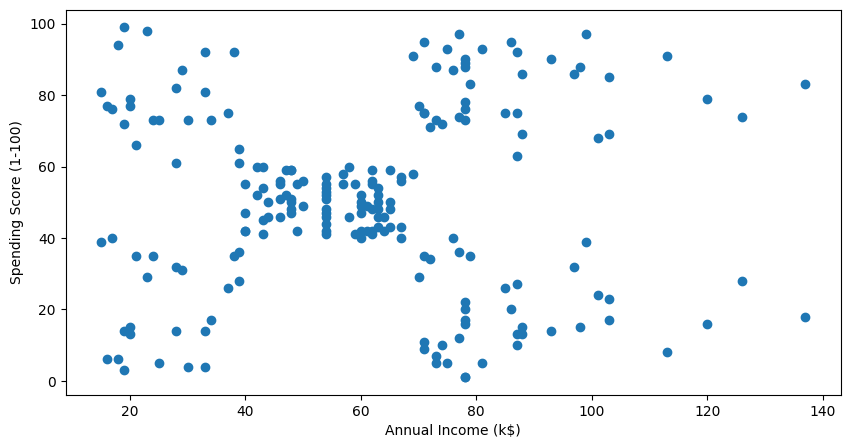

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


In [65]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.3,min_samples=5)
clusters=dbscan.fit_predict(x_scaled)

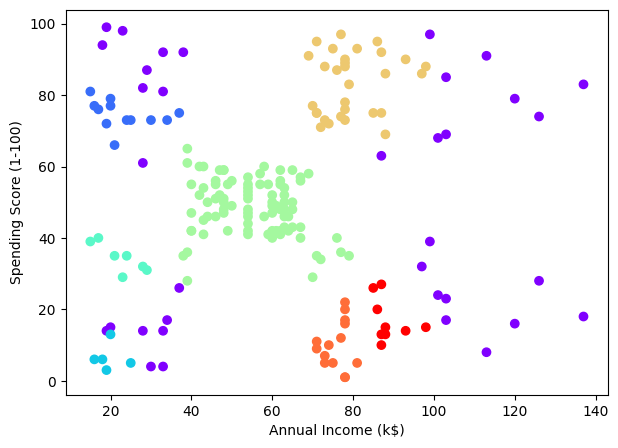

In [66]:
plt.figure(figsize=(7,5))
plt.scatter(x['Annual Income (k$)'],
            x['Spending Score (1-100)'],
            c=clusters,
            cmap='rainbow')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [67]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.31595469080938154


In [68]:
eps_value = [0.2, 0.3, 0.5]

for eps in eps_value:
    print(f"\nEvaluating DBSCAN using eps = {eps}")
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(x_scaled)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
    print(f"Number of clusters: {n_clusters}")
    n_noise = list(labels).count(-1)
    noise_ratio = n_noise / len(labels)
    print(f"Number of noise points: {n_noise}")
    print(f"Noise ratio: {round(noise_ratio, 2)}")
    if n_clusters > 1:
        score = silhouette_score(x_scaled, labels)
        print(f"Silhouette Score: {round(score, 3)}")
    else:
        print("Silhouette Score: Cannot calculate (less than 2 clusters)")



Evaluating DBSCAN using eps = 0.2
Number of clusters: 7
Number of noise points: 77
Noise ratio: 0.39
Silhouette Score: 0.141

Evaluating DBSCAN using eps = 0.3
Number of clusters: 7
Number of noise points: 35
Noise ratio: 0.17
Silhouette Score: 0.316

Evaluating DBSCAN using eps = 0.5
Number of clusters: 2
Number of noise points: 8
Noise ratio: 0.04
Silhouette Score: 0.35
